# World Data League 2021

## Authors

- Tânia Carvalho

## External links and resources

Dog parks in Linbon - http://dados.cm-lisboa.pt/dataset/parques-caninos

Urban parks in Lisbon - http://dados.cm-lisboa.pt/dataset/jardins-parques-urbanos


## Introduction
In this stage, I will solve the challenge 2: Attracting Population to Green Spaces in Metropolitan Areas.

Green spaces are very important for the ecosystem and have many benefits for human health. So it is indeed relevant that there is a greater attraction for these spaces, especially in metropolitan areas.

This challenge is somewhat limited to the amount of data, and so the first thing I tried to do was to better characterise green spaces through public data. 

Then I checked whether these new features influence the results comparing it to the baseline model. 

To improve the prediction results, I tried different parameters. 

The results show that the number of tourist attractions and the number of museums were the factors that contributed most to the prediction.

## Development

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
import kneed
import json

In [2]:
green_areas = pd.read_csv('Stage4/WDL_Green_Areas_Dataset_V1.txt', sep='|', encoding = "latin1")
green_areas.head()

,Green_Zone_name,Number of Museums in influence area,Number of parking lots in influence area,Number of tourist attractions in influence area,Green Zones Daily Average Demand,Resident,Daily average of people in influence area,Number of buildings in influence area,Number of families in influence area,Number of people resident in influence area,perc_senior_pop,perc_pop_until_19_yo,POINT_X,POINT_Y
0,ESPAÇO JOGO E RECREIO HOMEM DO LEME,5,28,30,3.728677,1,17780.803014,4783,15352,38012,0.195123,0.196017,-8.68415,41.16001
1,ESPAÇO JOGO E RECREIO HOMEM DO LEME,5,28,30,3.728677,0,45787.629298,4783,15352,38012,0.195123,0.196017,-8.68415,41.16001
2,JARDIM AFONSO DE ALBUQUERQUE,93,129,78,10.259113,0,42877.741202,1775,17185,41163,0.161747,0.204917,-9.19949,38.69674
3,JARDIM AFONSO DE ALBUQUERQUE,93,129,78,10.259113,1,17497.825376,1775,17185,41163,0.161747,0.204917,-9.19949,38.69674
4,JARDIM ALAMEDA CIDADE UNIVERSITÁRIA,8,23,4,47.347816,0,42877.741202,1775,17185,41163,0.161747,0.204917,-9.15757,38.75294


In [3]:
green_areas.shape

(128, 14)

In [4]:
green_areas.nunique()

Green_Zone_name                                    64
Number of Museums in influence area                37
Number of parking lots in influence area           43
Number of tourist attractions in influence area    37
Green Zones Daily Average Demand                   64
Resident                                            2
Daily average of people in influence area          42
Number of buildings in influence area              21
Number of families in influence area               21
Number of people resident in influence area        21
perc_senior_pop                                    21
perc_pop_until_19_yo                               21
POINT_X                                            64
POINT_Y                                            64
dtype: int64

Is there any relationship between the number of tourist attractions and the number of museums in influence area?

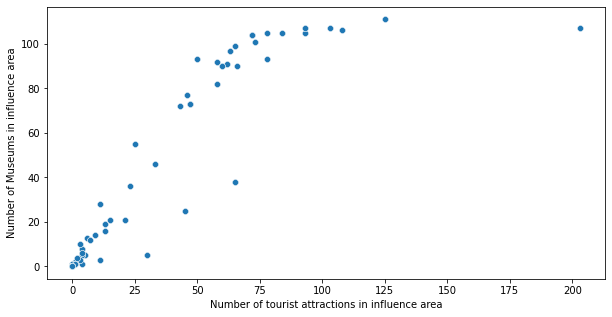

In [5]:
fig = plt.subplots(figsize=(10,5))
sns.scatterplot(data=green_areas, x='Number of tourist attractions in influence area', y='Number of Museums in influence area')
plt.show()

In fact there is a clear relationship between these two variables. The greater the number of tourist attractions, the more museums there are in the influence area.

And is there any relationship between the number of families and the number of buildings in influence area?

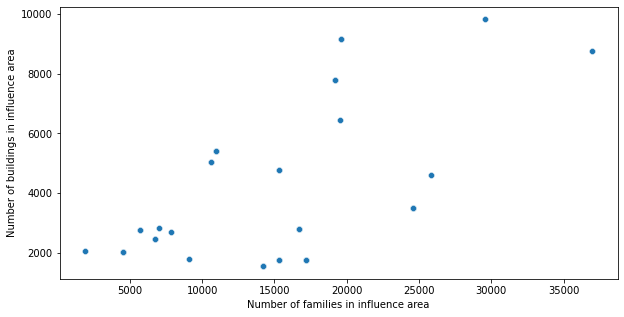

In [6]:
fig = plt.subplots(figsize=(10,5))
sns.scatterplot(data=green_areas, x='Number of families in influence area', y='Number of buildings in influence area')
plt.show()

This relationship is not as clear as the previous one. However, it can be seen that there is a tendency for the number of families in influent area to increase when there are more buildings. 

Which green spaces have the highest demand and percentage of young and old people?

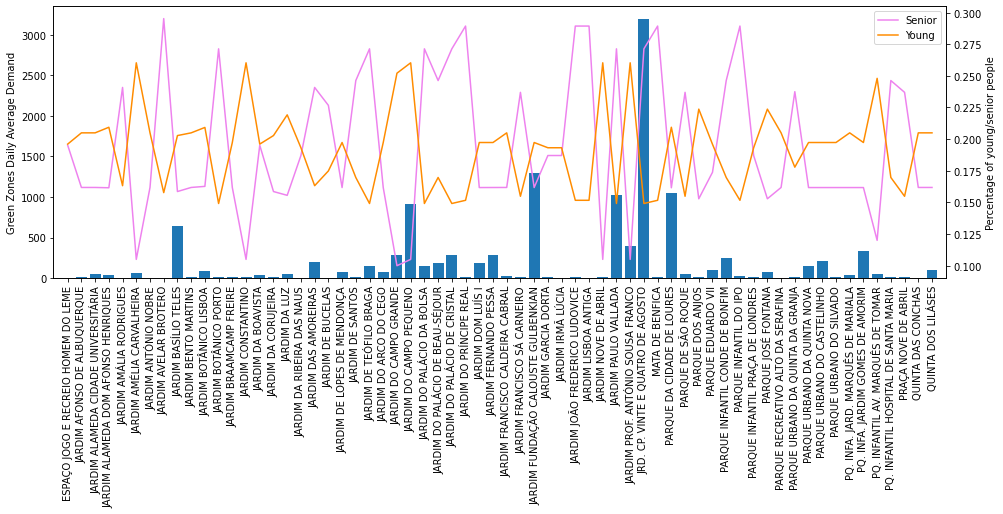

In [7]:
fig = plt.figure(figsize=(16,5))
ax = fig.add_subplot(111) # Create axes

plt.bar(green_areas['Green_Zone_name'], green_areas['Green Zones Daily Average Demand'])
ax2 = plt.twinx()
plt.plot(green_areas['Green_Zone_name'], green_areas['perc_senior_pop'], color='violet', label='Senior')
plt.plot(green_areas['Green_Zone_name'], green_areas['perc_pop_until_19_yo'], color='darkorange', label='Young')

ax.set_ylabel('Green Zones Daily Average Demand')
ax2.set_ylabel('Percentage of young/senior people')
ax.margins(x=0.01)
plt.setp(ax.get_xticklabels(), rotation=90)

plt.legend()
plt.show()

From the plot above we can see that the "Jardim campo vinte e quatro de agosto" has the highest demand. With regard to people aged up to 19 and over 65, there is opposition between these age groups. In most of the green areas, there is a higher percentage of young people in the influent areas or older people, only in "Espaço jogo e recreio homem do leme" there is the same percentage. We also note that there are 7 green zones with a low percentage of senior people in influent area (<0.125).

What is the relationship between the number of people resident in influence area and the demand?

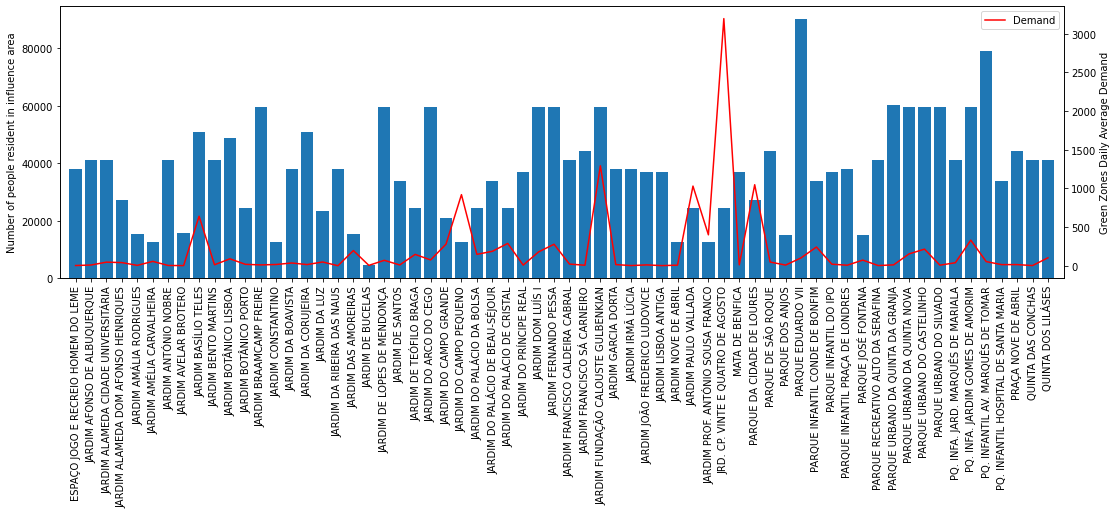

In [8]:
fig = plt.figure(figsize=(18,5))
ax = fig.add_subplot(111) # Create axes

plt.bar(green_areas['Green_Zone_name'], green_areas['Number of people resident in influence area'])
ax2 = plt.twinx()
plt.plot(green_areas['Green_Zone_name'], green_areas['Green Zones Daily Average Demand'], color='red', label='Demand')

ax.set_ylabel('Number of people resident in influence area')
ax2.set_ylabel('Green Zones Daily Average Demand')
ax.margins(x=0.01)
plt.setp(ax.get_xticklabels(), rotation=90)

plt.legend()
plt.show()

There are some peaks in demand, but they are not directly related to the number of people in the influential area. One of the peaks stands out more, which could be an outlier.

### Baseline

In this phase, the aim is to predict the demand so that we have a model as a baseline. The only change to the original data for the baseline was the removal of duplicates.

In [9]:
data_red = green_areas.drop_duplicates(subset ="Green_Zone_name").reset_index(drop=True)

In [10]:
data_red.shape

(64, 14)

In [11]:
cols = data_red.columns[np.r_[1:12]]
mod_baseline = data_red[cols]

In [12]:
cols = mod_baseline.columns[np.r_[0:3, 4:11]]
X = mod_baseline[cols].values
y = mod_baseline[mod_baseline.columns[3]].values

In [13]:
def simple_model(X, y):
    # split data 75/25
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)
    
    # SVM and RF algorithms is sensitive to feature scalin, sowe scale the data
    scaler = StandardScaler()
    scaler.fit(X_train) 
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    # Initiate models
    lreg = LinearRegression()
    rf = RandomForestRegressor()
    svr = SVR()

    models = [lreg, rf, svr]
    name_models = ['Linear Regression', 'Random Forest Regreesor', 'Support Vector Machine Regressor']
    
    best_model = 0
    c = 0
    for idx, model in enumerate(models):
        # fit models
        model.fit(X_train, y_train)
        
        #scores
        mse = mean_squared_error(y_test, model.predict(X_test))
        mae = mean_absolute_error(y_test, model.predict(X_test))
        
        # find best score
        if c < mae:
            c = mae
            best_model = idx
            
        # print the prediction scores
        print('\n' + name_models[idx])
        # print('MSE: {}'.format(mse))
        print('MAE: {}'.format(mae))
    
    # fit with best result
    models[best_model].fit(X_train, y_train)
    y_pred = models[best_model].predict(X_test)
    
    return y_test, y_pred

In [14]:
_, _ = simple_model(X, y)


Linear Regression
MAE: 188.53662881279843

Random Forest Regreesor
MAE: 103.19420443089581

Support Vector Machine Regressor
MAE: 59.47963883021655


At this point, we already have our candidate elected - Support Vector Machine Regressor - which has the lower MAE.

### Clustering

What if we add a new variable with the possible group of characteristics that a certain garden belongs to?

In [15]:
data_red.columns[np.r_[1:5, 7:12]]

Index(['Number of Museums in influence area',
       'Number of parking lots in influence area',
       'Number of tourist attractions in influence area',
       'Green Zones Daily Average Demand',
       'Number of buildings in influence area',
       'Number of families in influence area',
       'Number of people resident in influence area', 'perc_senior_pop',
       'perc_pop_until_19_yo'],
      dtype='object')

These characteristics were selected for the creation of the groups and then standardised.

In [16]:
rel_info = data_red[data_red.columns[np.r_[1:5, 7:12]]]

In [17]:
scaler = StandardScaler()
scaler.fit(rel_info)
rel_info_normalized = scaler.transform(rel_info)

Then, the best k was chosen.

In [18]:
kmeans_kwargs = {
        "init": "random",
        "n_init": 10,
        "max_iter": 300,
        "random_state": 42,
   }

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(rel_info_normalized)
    sse.append(kmeans.inertia_) # SSE to closest cluster centroid

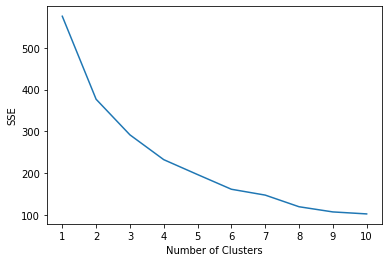

In [19]:
#plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [20]:
kl = kneed.KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
kl.elbow

4

In [21]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(rel_info_normalized)

In [22]:
data_red['cluster'] = kmeans.labels_

### Add external data

Let's check if by characterising the parks more the results in demand prediction improve.

I start by checking whether the park is also a dog park or not. 

In [23]:
with open('Stage4/dogs_zone_lisbon.json', 'r') as file:
    dog_parks_data = file.read()
dog_parks_data = json.loads(dog_parks_data)

In [24]:
dog_parks_data = dog_parks_data['features']
d = str(dog_parks_data)[1:-1]
d = eval(d)

In [25]:
dog_parks = pd.DataFrame(columns=['DESIGNACAO', 'MORADA', 'FREGUESIA', 'Shape__Area', 'Shape__Length'])

for idx, _ in enumerate(d):
    dog_parks.loc[idx, 'DESIGNACAO'] = d[idx]['properties']['DESIGNACAO']
    dog_parks.loc[idx,'MORADA'] = d[idx]['properties']['MORADA']
    dog_parks.loc[idx,'FREGUESIA'] = d[idx]['properties']['FREGUESIA']
    dog_parks.loc[idx,'Shape__Area'] = d[idx]['properties']['Shape__Area']
    dog_parks.loc[idx,'Shape__Length'] = d[idx]['properties']['Shape__Length']

In [26]:
dog_parks.head()

,DESIGNACAO,MORADA,FREGUESIA,Shape__Area,Shape__Length
0,Parque Canino do Parque das Nações 2,Passeio do Tejo,Parque das Nações,3860.097656,353.147983
1,Parque Canino do Parque Florestal do Monsanto,Estrada de Montes Claros,Alcântara,995.055176,132.780812
2,Parque Canino do Parque das Nações 1 - Parque ...,Passeio dos Heróis do Mar,Parque das Nações,2808.497559,251.388489
3,Parque Canino do Parque Oeste,Avenida Nuno Krus Abecassis,Santa Clara,1691.398926,175.585577
4,Parque Canino da Mata de Alvalade,Avenida Almirante Gago Coutinho,Alvalade,3188.542969,228.018319


In [27]:
# some clean up to match the parks
dog_parks.DESIGNACAO = dog_parks.DESIGNACAO.apply(lambda x: x.upper())
dog_parks['DESIGNACAO'] = dog_parks['DESIGNACAO'].apply(lambda x: x.replace('PARQUE CANINO DO ', ''))
dog_parks['DESIGNACAO'] = dog_parks['DESIGNACAO'].apply(lambda x: x.replace('PARQUE CANINO DE ', ''))
dog_parks['DESIGNACAO'] = dog_parks['DESIGNACAO'].apply(lambda x: x.replace('PARQUE CANINO DA ', ''))
dog_parks['DESIGNACAO'].head()

0                  PARQUE DAS NAÇÕES 2
1         PARQUE FLORESTAL DO MONSANTO
2    PARQUE DAS NAÇÕES 1 - PARQUE TEJO
3                         PARQUE OESTE
4                     MATA DE ALVALADE
Name: DESIGNACAO, dtype: object

Add new attribute with binary information on dog park

In [28]:
data_red['Dog Park'] = data_red.Green_Zone_name.isin(dog_parks.DESIGNACAO) * 1

For the city of porto we were not able to obtain open data on dog parks. However, with a brief search we found some dog parks.

In [29]:
# list of dog parks in Porto city
dog_parks_porto = ['Parque Canino de Matosinhos', 'Parque Canino do Jardim Paulo Vallada', 'Parque Canino da Quinta do Covelo', 'Parque Canino do Parque Ambiental da Ribeira de Picoutos', 'Parque Canino da Seara', 'Parque Canino da Maia', 'Parque Canino da Quinta do Passal']
# some clean up
dog_parks_porto = list(map(lambda x: x.upper(), dog_parks_porto))
dog_parks_porto = list(map(lambda x: x.replace('PARQUE CANINO DO ', ''), dog_parks_porto))
dog_parks_porto = list(map(lambda x: x.replace('PARQUE CANINO DE ', ''), dog_parks_porto))
dog_parks_porto = list(map(lambda x: x.replace('PARQUE CANINO DA ', ''), dog_parks_porto))

In [30]:
dog_parks_porto

['MATOSINHOS',
 'JARDIM PAULO VALLADA',
 'QUINTA DO COVELO',
 'PARQUE AMBIENTAL DA RIBEIRA DE PICOUTOS',
 'SEARA',
 'MAIA',
 'QUINTA DO PASSAL']

In [31]:
for idx in range(0, len(data_red)):
    if data_red.loc[idx, 'Green_Zone_name'] in dog_parks_porto:
        data_red.loc[idx, 'Dog Park'] = 1

In [32]:
# data_red[data_red['Dog Park']==1]

Information on urban parks is also added.

In [33]:
with open('Stage4/urban_parks_lisbon.json', 'r') as file:
    parks_data = file.read()
parks_data = json.loads(parks_data)

In [34]:
parks_data = parks_data['features']
d = str(parks_data)[1:-1]
d = eval(d)

In [35]:
parks = pd.DataFrame(columns=['CAT_NOME', 'INF_NOME', 'INF_MORADA'])

for idx, _ in enumerate(d):
    parks.loc[idx, 'CAT_NOME'] = d[idx]['properties']['CAT_NOME']
    parks.loc[idx,'INF_NOME'] = d[idx]['properties']['INF_NOME']
    parks.loc[idx,'INF_MORADA'] = d[idx]['properties']['INF_MORADA']
    

In [36]:
parks.INF_NOME = parks.INF_NOME.apply(lambda x: x.upper())

In [37]:
parks.head()

,CAT_NOME,INF_NOME,INF_MORADA
0,Espaços Verdes e Lazer - Jardins / Parques Urb...,PARQUE DA TAPADA DA AJUDA,Calçada da Tapada
1,Espaços Verdes e Lazer - Jardins / Parques Urb...,JARDIM FIALHO DE ALMEIDA,Praça das Flores
2,Espaços Verdes e Lazer - Jardins / Parques Urb...,JARDIM BOTTO MACHADO / JARDIM DE SANTA CLARA,Campo de Santa Clara\n
3,Espaços Verdes e Lazer - Jardins / Parques Urb...,PARQUE JOSÉ GOMES FERREIRA - MATA DE ALVALADE,Avenida Almirante Gago Coutinho
4,Espaços Verdes e Lazer - Jardins / Parques Urb...,JARDIM VASCO DA GAMA,Rua Vieira Portuense\n1300-571 Lisboa


In [38]:
data_red['Urban Park'] = data_red.Green_Zone_name.isin(parks.INF_NOME) * 1

If 'urban' is in the park name I also change the value of the variable

In [39]:
for idx in range(0, len(data_red)):
    if 'URBANO' in data_red.loc[idx, 'Green_Zone_name']:
        data_red.loc[idx, 'Urban Park'] = 1

In [40]:
len(data_red[data_red['Urban Park']==1])

11

In [41]:
data_red.head()

,Green_Zone_name,Number of Museums in influence area,Number of parking lots in influence area,Number of tourist attractions in influence area,Green Zones Daily Average Demand,Resident,Daily average of people in influence area,Number of buildings in influence area,Number of families in influence area,Number of people resident in influence area,perc_senior_pop,perc_pop_until_19_yo,POINT_X,POINT_Y,cluster,Dog Park,Urban Park
0,ESPAÇO JOGO E RECREIO HOMEM DO LEME,5,28,30,3.728677,1,17780.803014,4783,15352,38012,0.195123,0.196017,-8.68415,41.16001,2,0,0
1,JARDIM AFONSO DE ALBUQUERQUE,93,129,78,10.259113,0,42877.741202,1775,17185,41163,0.161747,0.204917,-9.19949,38.69674,0,0,1
2,JARDIM ALAMEDA CIDADE UNIVERSITÁRIA,8,23,4,47.347816,0,42877.741202,1775,17185,41163,0.161747,0.204917,-9.15757,38.75294,2,0,0
3,JARDIM ALAMEDA DOM AFONSO HENRIQUES,105,175,84,41.485945,0,6008.626849,5028,10598,27362,0.161501,0.209341,-9.13207,38.73757,3,1,0
4,JARDIM AMÁLIA RODRIGUES,8,8,4,5.768512,0,32809.647241,2472,6729,15460,0.240815,0.163131,-9.15459,38.73062,1,0,1


### How this new information impact the results?

In [42]:
cols = data_red.columns[np.r_[1:4, 5:12,14:17]]
X = data_red[cols].values
y = data_red[data_red.columns[4]].values

In [62]:
y_test, y_pred = simple_model(X, y)


Linear Regression
MAE: 182.8862317470452

Random Forest Regreesor
MAE: 99.91844290195687

Support Vector Machine Regressor
MAE: 59.75303308762487


Taking into account Random Forest Regressor and Linear Regression, these two improved performance, however SVR did not change .

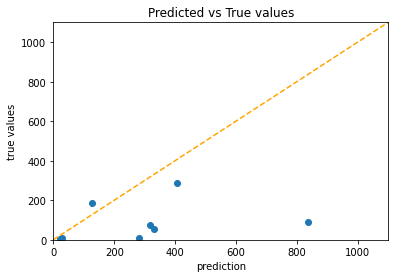

In [44]:
plt.scatter(y_pred, y_test)
plt.plot(np.linspace(0,1100,1100), np.linspace(0,1100,1100), c = 'orange', linestyle='--')
plt.xlabel('prediction')
plt.ylabel('true values')
plt.xlim(0,1100)
plt.ylim(0,1100)
plt.title('Predicted vs True values')
plt.show()

This graph concerns the SVR prediction. We can verify that this model is still failing to predict quite a few data points.

### Outliers

/Users/taniacarvalho/Desktop/PyProjects/WDL2021/venv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


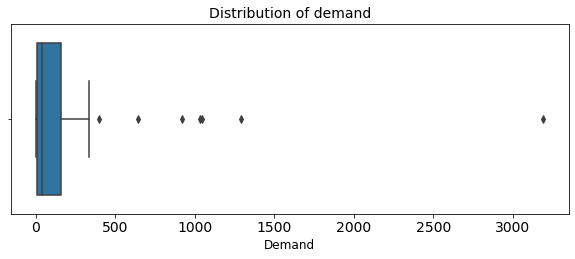

In [45]:
plt.subplots(figsize=(10,3.5))
# box plot of the variable demand
ax = sns.boxplot(data_red['Green Zones Daily Average Demand'])
plt.xticks(fontsize=14)
plt.xlabel('Demand', fontsize=12)
plt.title('Distribution of demand', fontsize=14)
plt.show()

Due to the small size of the data, only the extreme outlier was modified to the value below it.

In [46]:
# data_red['Green Zones Daily Average Demand'] = np.where(data_red['Green Zones Daily Average Demand'] < data_red['Green Zones Daily Average Demand'].quantile(0.10), data_red['Green Zones Daily Average Demand'].quantile(0.10) ,data_red['Green Zones Daily Average Demand'])
data_red['Green Zones Daily Average Demand'] = np.where(data_red['Green Zones Daily Average Demand'] == data_red['Green Zones Daily Average Demand'].quantile(1), data_red['Green Zones Daily Average Demand'].quantile(0.95),data_red['Green Zones Daily Average Demand'])
# print(data_red['Green Zones Daily Average Demand'].skew())

### Correlation

In [51]:
clean_data = data_red[data_red.columns[np.r_[1:12,14:17]]]
corr = clean_data.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Number of Museums in influence area,Number of parking lots in influence area,Number of tourist attractions in influence area,Green Zones Daily Average Demand,Resident,Daily average of people in influence area,Number of buildings in influence area,Number of families in influence area,Number of people resident in influence area,perc_senior_pop,perc_pop_until_19_yo,cluster,Dog Park,Urban Park
Number of Museums in influence area,1.00,0.93,0.89,0.04,0.02,-0.39,-0.01,0.08,0.12,-0.53,0.57,-0.10,0.01,-0.04
Number of parking lots in influence area,0.93,1.00,0.94,0.03,0.13,-0.45,0.14,0.06,0.13,-0.58,0.63,-0.02,0.04,-0.04
Number of tourist attractions in influence area,0.89,0.94,1.00,0.02,0.24,-0.34,0.22,0.19,0.24,-0.49,0.52,-0.13,-0.00,-0.07
Green Zones Daily Average Demand,0.04,0.03,0.02,1.00,0.03,-0.03,0.17,-0.07,-0.06,-0.07,0.04,-0.10,0.07,-0.17
Resident,0.02,0.13,0.24,0.03,1.00,-0.05,0.29,0.23,0.24,-0.04,-0.01,-0.19,-0.11,-0.15
Daily average of people in influence area,-0.39,-0.45,-0.34,-0.03,-0.05,1.00,0.37,0.44,0.36,0.47,-0.62,-0.43,0.03,-0.05
Number of buildings in influence area,-0.01,0.14,0.22,0.17,0.29,0.37,1.00,0.39,0.41,0.11,-0.19,-0.35,-0.01,-0.18
Number of families in influence area,0.08,0.06,0.19,-0.07,0.23,0.44,0.39,1.00,0.99,-0.04,-0.14,-0.58,0.03,0.10
Number of people resident in influence area,0.12,0.13,0.24,-0.06,0.24,0.36,0.41,0.99,1.00,-0.14,-0.05,-0.54,0.03,0.11
perc_senior_pop,-0.53,-0.58,-0.49,-0.07,-0.04,0.47,0.11,-0.04,-0.14,1.00,-0.95,-0.37,-0.09,-0.21


In [53]:
# create correlation matrix
corr_matrix = clean_data.corr().abs()

# upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
print(to_drop)

# drop features 
clean_data.drop(to_drop, axis=1, inplace=True)

['Number of people resident in influence area']


<ipython-input-53-b8641cd9cc39>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
/Users/taniacarvalho/Desktop/PyProjects/WDL2021/venv/lib/python3.9/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Number of people resident in influence area was removed beacause was highly correlated with number of families in influent area.

In [55]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 13 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Number of Museums in influence area              64 non-null     int64  
 1   Number of parking lots in influence area         64 non-null     int64  
 2   Number of tourist attractions in influence area  64 non-null     int64  
 3   Green Zones Daily Average Demand                 64 non-null     float64
 4   Resident                                         64 non-null     int64  
 5   Daily average of people in influence area        64 non-null     float64
 6   Number of buildings in influence area            64 non-null     int64  
 7   Number of families in influence area             64 non-null     int64  
 8   perc_senior_pop                                  64 non-null     float64
 9   perc_pop_until_19_yo              

In [56]:
X = clean_data[clean_data.columns[np.r_[0:3, 4:13]]].values
y = clean_data[clean_data.columns[3]].values

In [64]:
y_test, y_pred = simple_model(X, y)


Linear Regression
MAE: 182.8862317470452

Random Forest Regreesor
MAE: 97.10742950595835

Support Vector Machine Regressor
MAE: 59.75303308762487


Only the Random Forest Regressor slightly improves its performance.

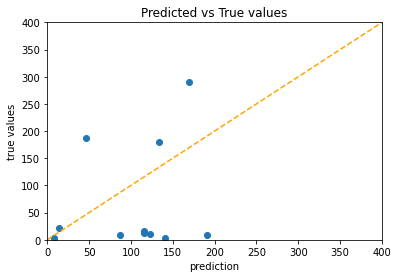

In [65]:
plt.scatter(y_pred, y_test)
plt.plot(np.linspace(0,400,400), np.linspace(0,400,400), c = 'orange', linestyle='--')
plt.xlabel('prediction')
plt.ylabel('true values')
plt.xlim(0,400)
plt.ylim(0,400)
plt.title('Predicted vs True values')
plt.show()

Until now the models had the default parameters. So, to improve the results we have to tune the parameters.

In [67]:
from sklearn.base import BaseEstimator
class RgsSwitcher(BaseEstimator):

    def __init__(self, estimator = SVR()):
        """
        A Custom BaseEstimator that can switch between classifiers.
        :param estimator: sklearn object - The classifier
        """ 
        self.estimator = estimator


    def fit(self, X, y=None, **kwargs):
        self.estimator.fit(X, y)
        return self


    def predict(self, X, y=None):
        return self.estimator.predict(X)


    def predict_proba(self, X):
        return self.estimator.predict_proba(X)


    def score(self, X, y):
        return self.estimator.score(X, y)

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)

pipeline = Pipeline([
    ('scale', StandardScaler()),
    ('rgs', RgsSwitcher()),
])

parameters = [
    {
        'rgs__estimator': [LinearRegression()], 
    },
    {
        'rgs__estimator': [RandomForestRegressor()],
        'rgs__estimator__n_estimators': [2, 4, 6, 8, 10, 12, 14],
        'rgs__estimator__max_depth': [1, 2, 4, 6, 8, 10, 12, 14],
    },
    {
        'rgs__estimator': [SVR()],
        'rgs__estimator__C': [0.01, 0.1, 1],
        'rgs__estimator__epsilon': [0.01, 0.1, 1, 10],
    }
]

gscv = GridSearchCV(pipeline, parameters, scoring=make_scorer(mean_absolute_error), cv=None, return_train_score=False, refit=True)
gscv.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('rgs', RgsSwitcher())]),
             param_grid=[{'rgs__estimator': [LinearRegression()]},
                         {'rgs__estimator': [RandomForestRegressor(max_depth=10,
                                                                   n_estimators=6)],
                          'rgs__estimator__max_depth': [1, 2, 4, 6, 8, 10, 12,
                                                        14],
                          'rgs__estimator__n_estimators': [2, 4, 6, 8, 10, 12,
                                                           14]},
                         {'rgs__estimator': [SVR()],
                          'rgs__estimator__C': [0.01, 0.1, 1],
                          'rgs__estimator__epsilon': [0.01, 0.1, 1, 10]}],
             scoring=make_scorer(mean_absolute_error))

In [69]:
print(gscv.best_params_)
print(gscv.best_score_)

{'rgs__estimator': RandomForestRegressor(max_depth=10, n_estimators=6), 'rgs__estimator__max_depth': 10, 'rgs__estimator__n_estimators': 6}
288.60317546399995


In [70]:
mean_absolute_error(y_test, gscv.best_estimator_.predict(X_test))

144.56014760416667

In [71]:
train_sizes, train_scores, test_scores = learning_curve(
        estimator=gscv.best_estimator_, X=X_train, y=y_train,
        train_sizes=np.arange(0.1, 1.1, 0.1), cv=None, scoring=make_scorer(mean_absolute_error))


In [72]:
def plot_learning_curve(train_sizes, train_scores, test_scores, title, alpha=0.1):
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.subplots(figsize=(10,6))
    plt.plot(train_sizes, train_mean, label='train', color='blue', marker='o')
    plt.fill_between(train_sizes, train_mean + train_std,
                     train_mean - train_std, color='blue', alpha=alpha)
    plt.plot(train_sizes, test_mean, label='validation', color='red', marker='o')

    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, color='red', alpha=alpha)
    plt.title(title)
    plt.xlabel('Iterations')
    plt.ylabel('Mean absolute error')
    plt.grid(ls='--')
    plt.legend(loc='best')
    plt.show()


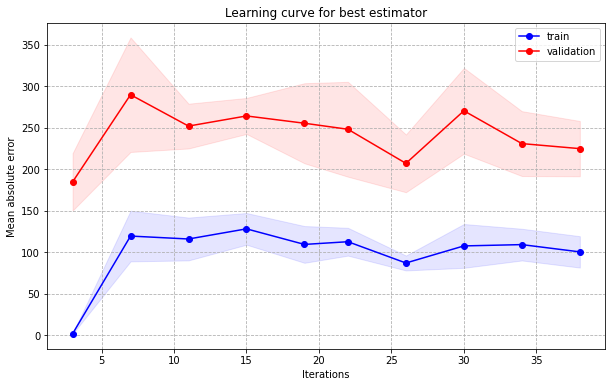

In [73]:
plot_learning_curve(train_sizes, train_scores, test_scores, title='Learning curve for best estimator')

In [74]:
gscv.best_params_['rgs__estimator']

RandomForestRegressor(max_depth=10, n_estimators=6)

In [102]:
model=gscv.best_params_['rgs__estimator']

model.fit(X_train, y_train)

mean_absolute_error(y_test, model.predict(X_test))

124.15666347239582

Which variables are most important for the model?

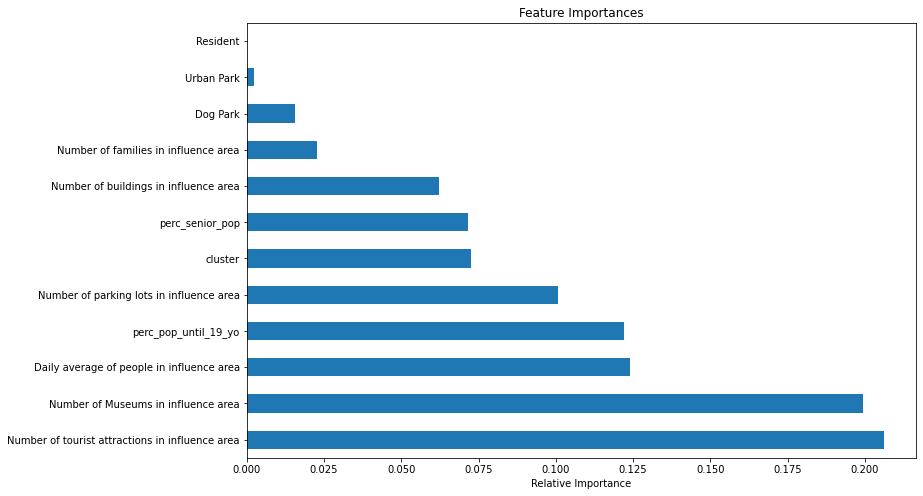

In [103]:
feat_importances = pd.Series(model.feature_importances_, index=clean_data[clean_data.columns[np.r_[0:3, 4:13]]].columns)
fig, ax = plt.subplots(figsize=(12, 8))
feat_importances.nlargest(13).plot(kind='barh')
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.show()

From these results, we can see that the factors that contributed most to the prediction were the number of tourist attractions and the number of museums.

### Sugestions of action points 

Although the fact that the park is suitable for animals did not play a big role in the prediction, I think this is due to the small number of dog parks and therefore, it is important that more parks allow dogs so that people can take their pet for a walk and enjoy a green space at the same time. 

For parks where there are more seniores than young people, I suggest creating an area of skateboard for attracting young people.

The collaboration with stakeholders and other sectors can be a huge help to green spaces in order to be more effective, as instance, with transports. [WHO](https://www.euro.who.int/__data/assets/pdf_file/0010/342289/Urban-Green-Spaces_EN_WHO_web3.pdf%3Fua=1) already mentioned some suggestions. 

In metropolitan areas, where there is not much space left for new parks, or people have to commute to green spaces, they can bring green spaces to buildings, especially office buildings (https://www.savills.co.uk/research_articles/229130/292858-0).

## Conclusions

### Scalability and Impact


This is a very interesting topic. Green spaces are fundamental for cleaner air and for people's mental health. 
However, data on green parks in Portugal is very limited, which also limits our conclusions. Nevertheless, the suggested action points will have an impact on increasing the demand for green spaces. 

### Future Work


The solution presented needs to be improved at the level of characterisation of green spaces, namely for the city of Porto.